#### Prediction of Heart Disease

## Import Necessary Library

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import StratifiedKFold

from tensorflow import keras
from tensorflow.keras import layers

import warnings    
warnings.filterwarnings("ignore")


---

## Setup : Import the Dataset

Dataset from Kaggle : `Indicators of Heart Disease`

Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data 

In [2]:
df = pd.read_csv('data.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


#### Explanation of the variables of the dataset
1. HeartDisease : Respondents who ever had heart disease. ( Yes or No )
2. BMI : Body Mass Index (BMI).
3. Smoking : Respondents that smoked at least 100 cigarettes in their entire life. ( Yes or No )
4. AlcoholDrinking : Adult men having more than 14 drinks per week & adult women having more than 7 drinks per week. ( Yes or No )
5. Stroke : Respondents who ever had stroke. ( Yes or No )
6. PhysicalHealth : Days during the past 30 days was your physical health(physical illness and injury) not good? ( 0-30 days )
7. MentalHealth : Days during the past 30 days was your mental health not good? ( 0-30 days )
8. DiffWalking : Difficulty walking or climbing stairs. ( Yes or No )
9. Sex : male or female
10. AgeCategory: Fourteen-level age category.
11. Race : Imputed race/ethnicity value.
12. Diabetic : Respondents who ever had diabetes. ( Yes or No )
13. PhysicalActivity : Physical activity or exercise during the past 30 days other than their regular job. ( Yes or No )
14. GenHealth : Would you say that in general your health is...
15. SleepTime : Average hours of sleep in a 24-hour period.
16. Asthma : Respondents who ever had asthma. ( Yes or No )
17. KidneyDisease : Respondents who ever had kidney disease. ( Yes or No )
18. SkinCancer : Respondents who ever had skin cancer. ( Yes or No )

---

## Clean the Dataset

In [3]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df1=df.copy()
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

In [6]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_counts = duplicate_rows.groupby(list(df.columns)).size()
df= df.drop_duplicates()

In [7]:
df_clean =  df[df.columns].replace({'18-24':1, '25-29':2, '30-34':3,'35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, '60-64':9, '65-69':10, '70-74':11,'75-79':12, '80 or older':13})

df_clean =  df_clean[df_clean.columns].replace({'White':1,'Hispanic':2,'Black':3,'Asian':4,'Other':5,'American Indian/Alaskan Native':6,'Excellent':1,'Very good':2,'Good':3,'Fair':4,'Poor':5})

## Exploratory Analysis¶

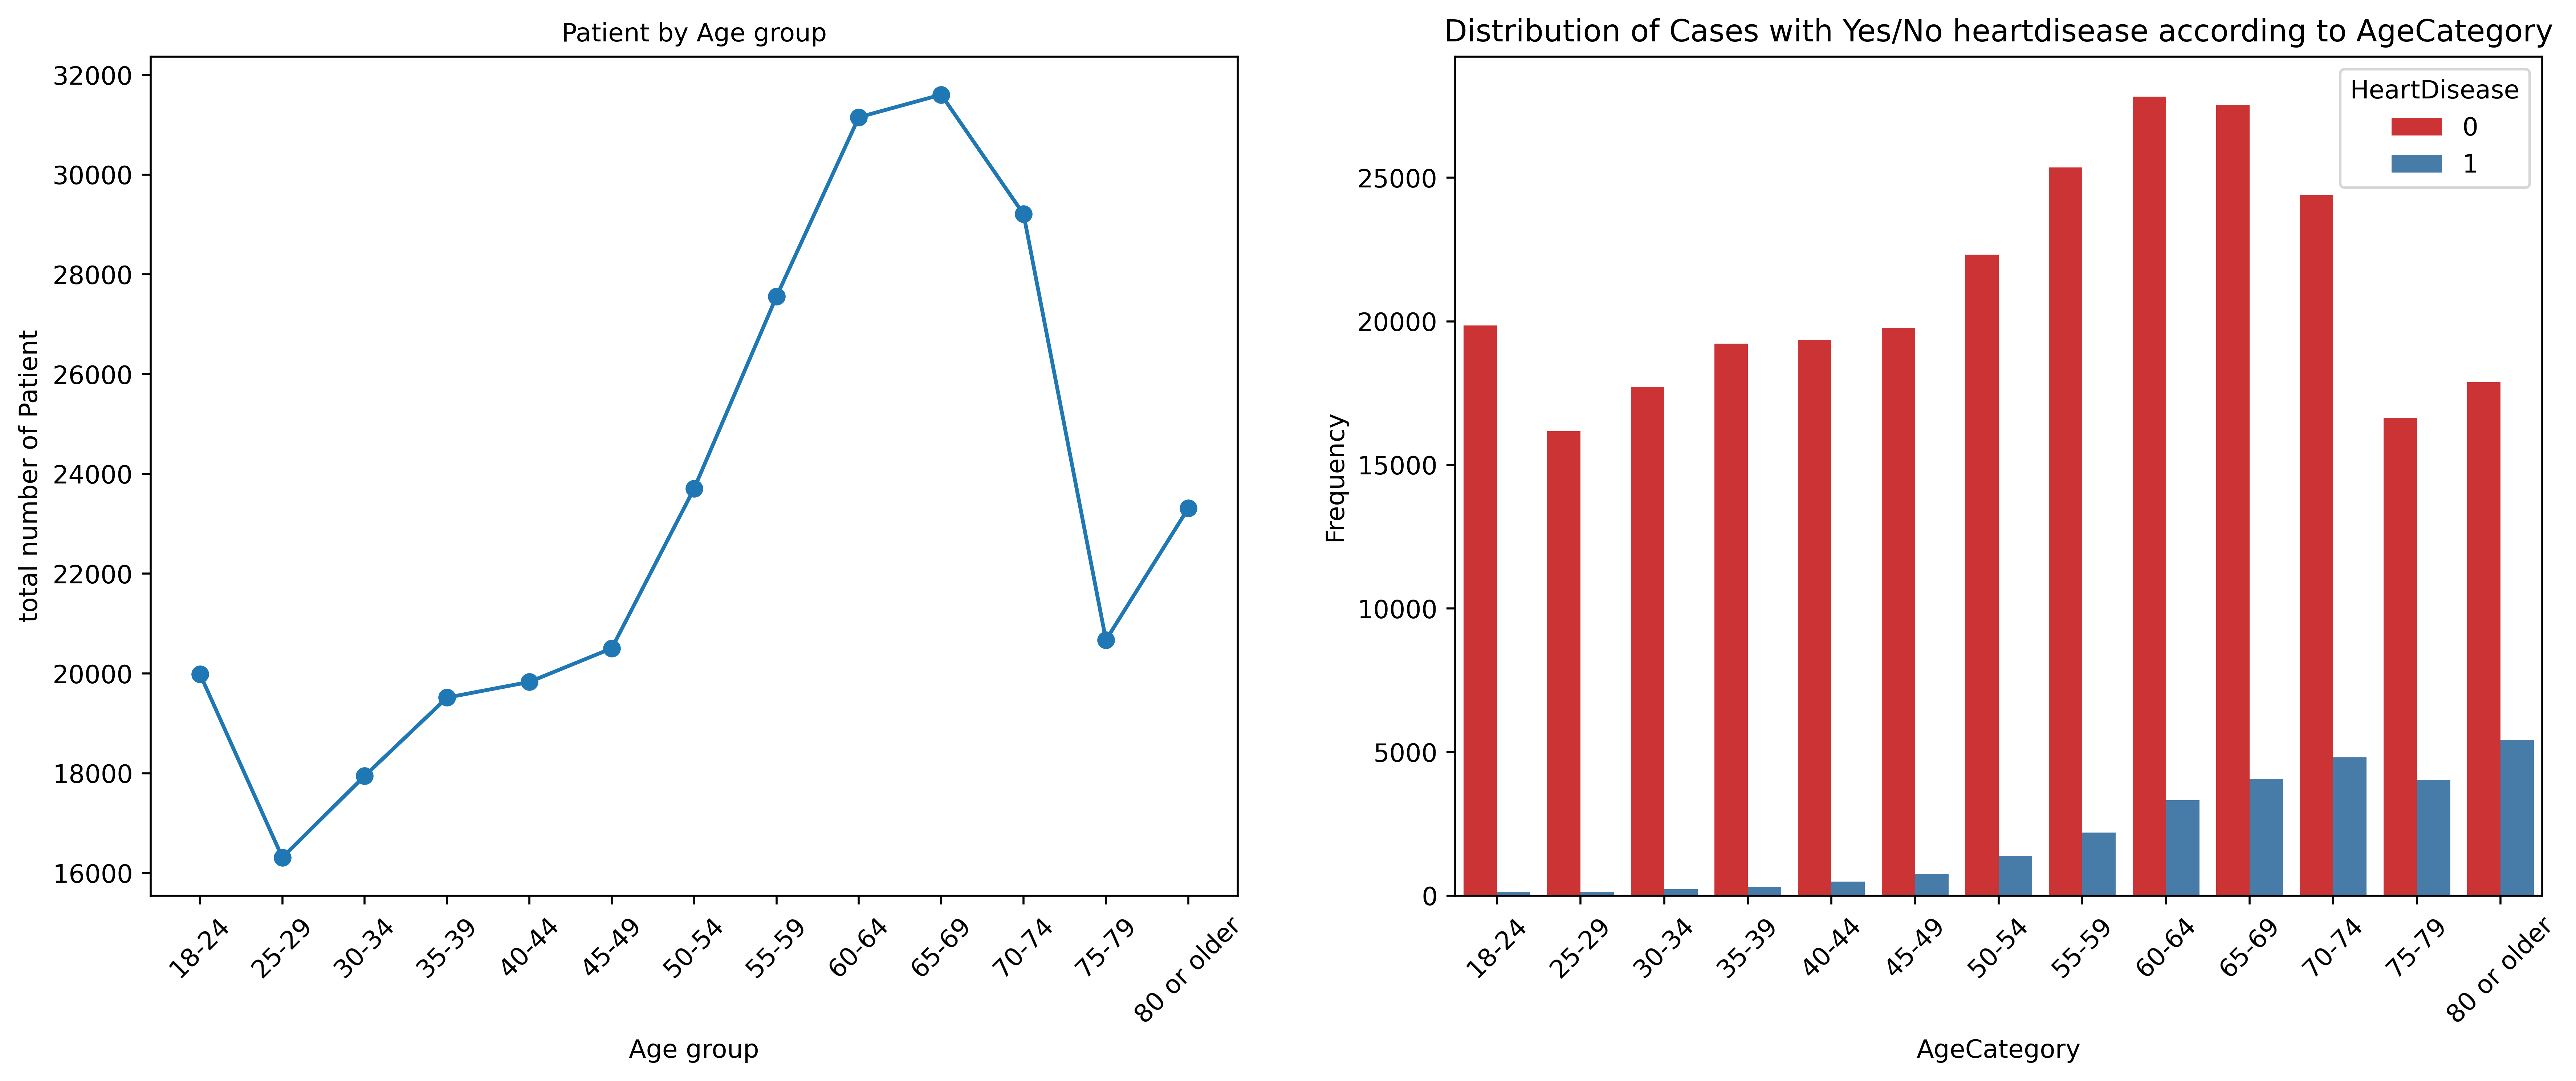

In [8]:
age_plot = df.groupby(["AgeCategory"])
Patient_groupby_age= {}
for age, group in age_plot:
    Patient_groupby_age[age]=(group["AgeCategory"].count())


x_axis = np.arange(0, len(Patient_groupby_age.keys()) ) 
ageCategory_order =['18-24', '25-29', '30-34','35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74','75-79', '80 or older'] 
fig , axes= plt.subplots(1,2, figsize=(17,6),dpi=500)
ax=plt.subplot(1,2,1 )    
ax0=plt.plot(x_axis, Patient_groupby_age.values(), marker="o")
ax.set_xticks(x_axis)
ax.set_xticklabels(ageCategory_order)
plt.title("Patient by Age group",size=10,)
plt.xlabel("Age group")
plt.ylabel("total number of Patient")
plt.xticks(rotation=45)



ax=plt.subplot(1,2,2 )     
order = pd.unique(df.AgeCategory.values)
order.sort()
ax1=sns.countplot(data=df, x='AgeCategory', hue='HeartDisease', palette='Set1', order=order)
plt.title("Distribution of Cases with Yes/No heartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
ax.set_xticks(x_axis)
ax.set_xticklabels(ageCategory_order)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show() 

In [9]:
color_catplot=["Crimson","DimGray"]
column_name=[ 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex','PhysicalActivity','Asthma', 'KidneyDisease', 'SkinCancer'] 
df_sorted=df.sort_values('AgeCategory')
X_tuple=tuple(tuple (x_axis))

for column in column_name:

    fig = plt.figure(figsize = (22,17),dpi=500)

    gs = fig.add_gridspec(10,24)
    gs.update(wspace = 1, hspace = 0.05)
    
    ax2 = fig.add_subplot(gs[0:3,5:18]) #distribution plot
    ax1 = fig.add_subplot(gs[4:5,0:]) #dumbbell plot

    # axes list
    axes = [ax1,ax2]

    # setting of axes; visibility of axes and spines turn off
    for ax in axes:
        ax.axes.get_yaxis().set_visible(False)
        ax.set_facecolor('#FFFFFF')
    
        for loc in ['left', 'right', 'top', 'bottom']:
            ax.spines[loc].set_visible(False)

    fig.patch.set_facecolor('#FFFFFF')
        
    ax1.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(True)
    ax1.set_xlim(xmin = -250,xmax = 2000)
    ax1.set_ylim(ymin = -1,ymax =3.5)

    # catplot

    g=sns.catplot(x=column , hue="HeartDisease", col="AgeCategory",data=df_sorted,
                kind="count", height=5, aspect=.3, palette=color_catplot, ax=ax1)
    
    for ax in g.axes.flat[1:]:
        sns.despine(ax=ax, left=False)
    for ax in g.axes.flat:
        ax.set_xlabel(ax.get_title())
        ax.set_title('')
        ax.margins(x=0.1) # slightly more margin as a separation
        ax.tick_params(axis='x', labelrotation=30)
    for ax in g.axes.ravel():
    
        # add annotations
        for c in ax.containers:
            # add custom labels with the labels=labels parameter if needed
            # labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
            ax.bar_label(c, label_type='edge')
        ax.margins(y=0.2)   

        #title for each     
    g.set_titles( col_template=' {col_name}')
    
    plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)

        #Remove lable form below of each 
    g.set_xlabels()

    # lineplot
    column_plot_first =   df[df[column] == 0]['AgeCategory'].value_counts().sort_index(axis = 0)
    column_plot_second= df[df[column] == 1]['AgeCategory'].value_counts().sort_index(axis = 0)
    
    sns.lineplot( column_plot_first, marker="o", color="Crimson", linewidth = 2.5,ms=15,mew=5 ,ax = ax2)
    sns.lineplot( column_plot_second, marker="o", color="DimGray",linewidth = 2.5,ms=15,mew=5, ax = ax2)
    
    ax2.set_xlabel('AgeCategory', fontdict = {'font':'Serif', 'color': 'black', 'size': 16 })
    ax2.set_xticks(x_axis)
    ax2.set_xticklabels(ageCategory_order)
    ax2.set_ylabel('Frequency',fontdict = {'font':'Serif', 'color': 'black', 'size': 16})
       

    fig.text(0.4,0.985, column +" Analysis" ,{'weight':'bold','color': 'Navy', 'size':35})
    fig.text(0.4, 1.1, " ")
    fig.text(0.65,0.835, '■   0 ', {'font': 'Serif','weight':'bold','size': '18','weight':'bold','style':'normal', 'color':"Crimson"})
    fig.text(0.65,0.815, '■   1', {'font': 'Serif','weight':'bold','size': '18','weight':'bold','style':'normal', 'color':"DimGray"})
    fig.text(0.3,0.905, 'Distribution '+column+' by age group', {'font': 'Serif','weight':'bold','size': '18','weight':'bold','style':'normal', 'color':"DimGray"})
    fig.text(0.25,0.515, 'Distribution of Cases with Yes/No heartdisease according to AgeCategory', {'font': 'Serif','weight':'bold','size': '18','weight':'bold','style':'normal', 'color':"DimGray"})
    
    fig.show()

In [ ]:
dk = df.copy()
dk.Stroke = dk.Stroke.apply(lambda x : 'Stroke' if x == 1 else 'No Stroke')
dk.DiffWalking = dk.DiffWalking.apply(lambda x : 'DiffWalking' if x == 1 else 'CanWalk')
dk.Diabetic = dk.Diabetic.apply(lambda x : 'Diabetic' if x == 1 else 'No Diabetic')
dk.Asthma = dk.Asthma.apply(lambda x : 'Asthma' if x == 1 else 'No Asthma')
dk.KidneyDisease = dk.KidneyDisease.apply(lambda x : 'KidneyDisease' if x == 1 else 'No KidneyDisease')
dk.drop(["BMI","Smoking","AlcoholDrinking","PhysicalHealth","MentalHealth","Sex","AgeCategory","Race","PhysicalActivity","GenHealth","SleepTime","SkinCancer"],axis=1, inplace=True)

from itertools import chain, combinations

Risky_patient = [ "Stroke" , "DiffWalking" , "Diabetic" ,  "Asthma" , "KidneyDisease"]
Total_bar=0
tmp = []
for i in range(len(Risky_patient)):
    oc = combinations(Risky_patient, i + 1)
    for c in oc:
        tmp.append(list(c))
        Total_bar+=1

#2 Factor
dk['St_Dif'] = dk[tmp[5][0]] + ' & ' + dk[tmp[5][1]]
dk['St_Dia'] = dk[tmp[6][0]] + ' & ' + dk[tmp[6][1]]
dk['St_As'] = dk[tmp[7][0]] + ' & ' + dk[tmp[7][1]]
dk['ST_Ki'] = dk[tmp[8][0]] + ' & ' + dk[tmp[8][1]]
dk['Dif_Dia'] = dk[tmp[9][0]] + ' & ' + dk[tmp[9][1] ]
dk['Dif_As'] = dk[tmp[10][0]] + ' & ' + dk[tmp[10][1]]
dk['Dif_Ki'] = dk[tmp[11][0]] + ' & ' + dk[tmp[11][1]]
dk['Dia_As'] = dk[tmp[12][0]] + ' & ' + dk[tmp[12][1]]
dk['Dia_Ki'] = dk[tmp[13][0]] + ' & ' + dk[tmp[13][1]]                                         
dk['As_Ki'] = dk[tmp[14][0]] + ' & ' + dk[tmp[14][1]]

#3 Factor
dk['St_Dif_Dia'] = dk[tmp[15][0]] + ' & ' + dk[tmp[15][1]]+ ' & ' +dk[tmp[15][2]]
dk['St_Dif_As'] = dk[tmp[16][0]] + ' & ' + dk[tmp[16][1]]+ ' & ' +dk[tmp[16][2]]
dk['St_Dif_Ki'] = dk[tmp[17][0]] + ' & ' + dk[tmp[17][1]]+ ' & ' +dk[tmp[17][2]]
dk['ST_Dia_As'] = dk[tmp[18][0]] + ' & ' + dk[tmp[18][1]]+ ' & ' +dk[tmp[18][2]]
dk['St_Dia_Ki'] = dk[tmp[19][0]] + ' & ' + dk[tmp[19][1]]+ ' & ' +dk[tmp[19][2]]
dk['St_As_ki'] = dk[tmp[20][0]] + ' & ' + dk[tmp[20][1]]+ ' & ' +dk[tmp[20][2]]
dk['Dif_Dia_As'] = dk[tmp[21][0]] + ' & ' + dk[tmp[21][1]]+ ' & ' +dk[tmp[21][2]]                                           
dk['Dif_Dia_Ki'] = dk[tmp[22][0]] + ' & ' + dk[tmp[22][1]]+ ' & ' +dk[tmp[22][2]]
dk['Dif_As_ki'] = dk[tmp[23][0]] + ' & ' + dk[tmp[23][1]]+ ' & ' +dk[tmp[23][2]]                                       
dk['Dia_As_Ki'] = dk[tmp[24][0]] + ' & ' + dk[tmp[24][1]]+ ' & ' +dk[tmp[24][2]] 


#4 Factor
dk['St_Dif_Dia_As'] = dk[tmp[25][0]] + ' & ' + dk[tmp[25][1]] + ' & ' + dk[tmp[25][2]]+ ' & ' + dk[tmp[25][3]]
dk['St_Dif_Dia_ki'] =dk[tmp[26][0]] + ' & ' + dk[tmp[26][1]] + ' & ' + dk[tmp[26][2]]+ ' & ' + dk[tmp[26][3]]
dk['St_Dif_As_ki'] = dk[tmp[27][0]] + ' & ' + dk[tmp[27][1]] + ' & ' + dk[tmp[27][2]]+ ' & ' + dk[tmp[27][3]]
dk['ST_Dia_As_Ki'] = dk[tmp[28][0]] + ' & ' + dk[tmp[28][1]] + ' & ' + dk[tmp[28][2]]+ ' & ' + dk[tmp[28][3]]
dk['Dif_Dia_As_Ki'] = dk[tmp[29][0]] + ' & ' + dk[tmp[29][1]] + ' & ' + dk[tmp[29][2]]+ ' & ' + dk[tmp[29][3]] 

                                           
#5 Factor                                           
dk['St_Dif_Dia_As_Ki'] = dk[tmp[30][0]] + ' & ' + dk[tmp[30][1]] + ' & ' + dk[tmp[30][2]] + ' & ' + dk[tmp[30][3]] + ' & ' + dk[tmp[30][4]] 

df_plot_risky_patient=pd.DataFrame()
list_item=dk.drop("HeartDisease",axis=1).columns

for item in list_item:
    
    df_plot_risky_patient1 = dk.groupby(item)['HeartDisease'].value_counts(normalize = True).mul(100)
    df_plot_risky_patient1 = df_plot_risky_patient1.rename('percent').reset_index()
    
    df_plot_risky_patient = pd.concat([df_plot_risky_patient,df_plot_risky_patient1.rename(columns={item:'Smoking'})], ignore_index=True)

df_risky_patient = df_plot_risky_patient[df_plot_risky_patient["HeartDisease"] == 1].reset_index()
df_selected = df_risky_patient[['Smoking', 'percent']].rename(columns={'Smoking': '','percent':'Percentage'})
df_styled = df_selected.style.format({'Percentage': '{:.2f}%'}).set_properties(**{'text-align': 'left'})

# Display the styled DataFrame
df_styled

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

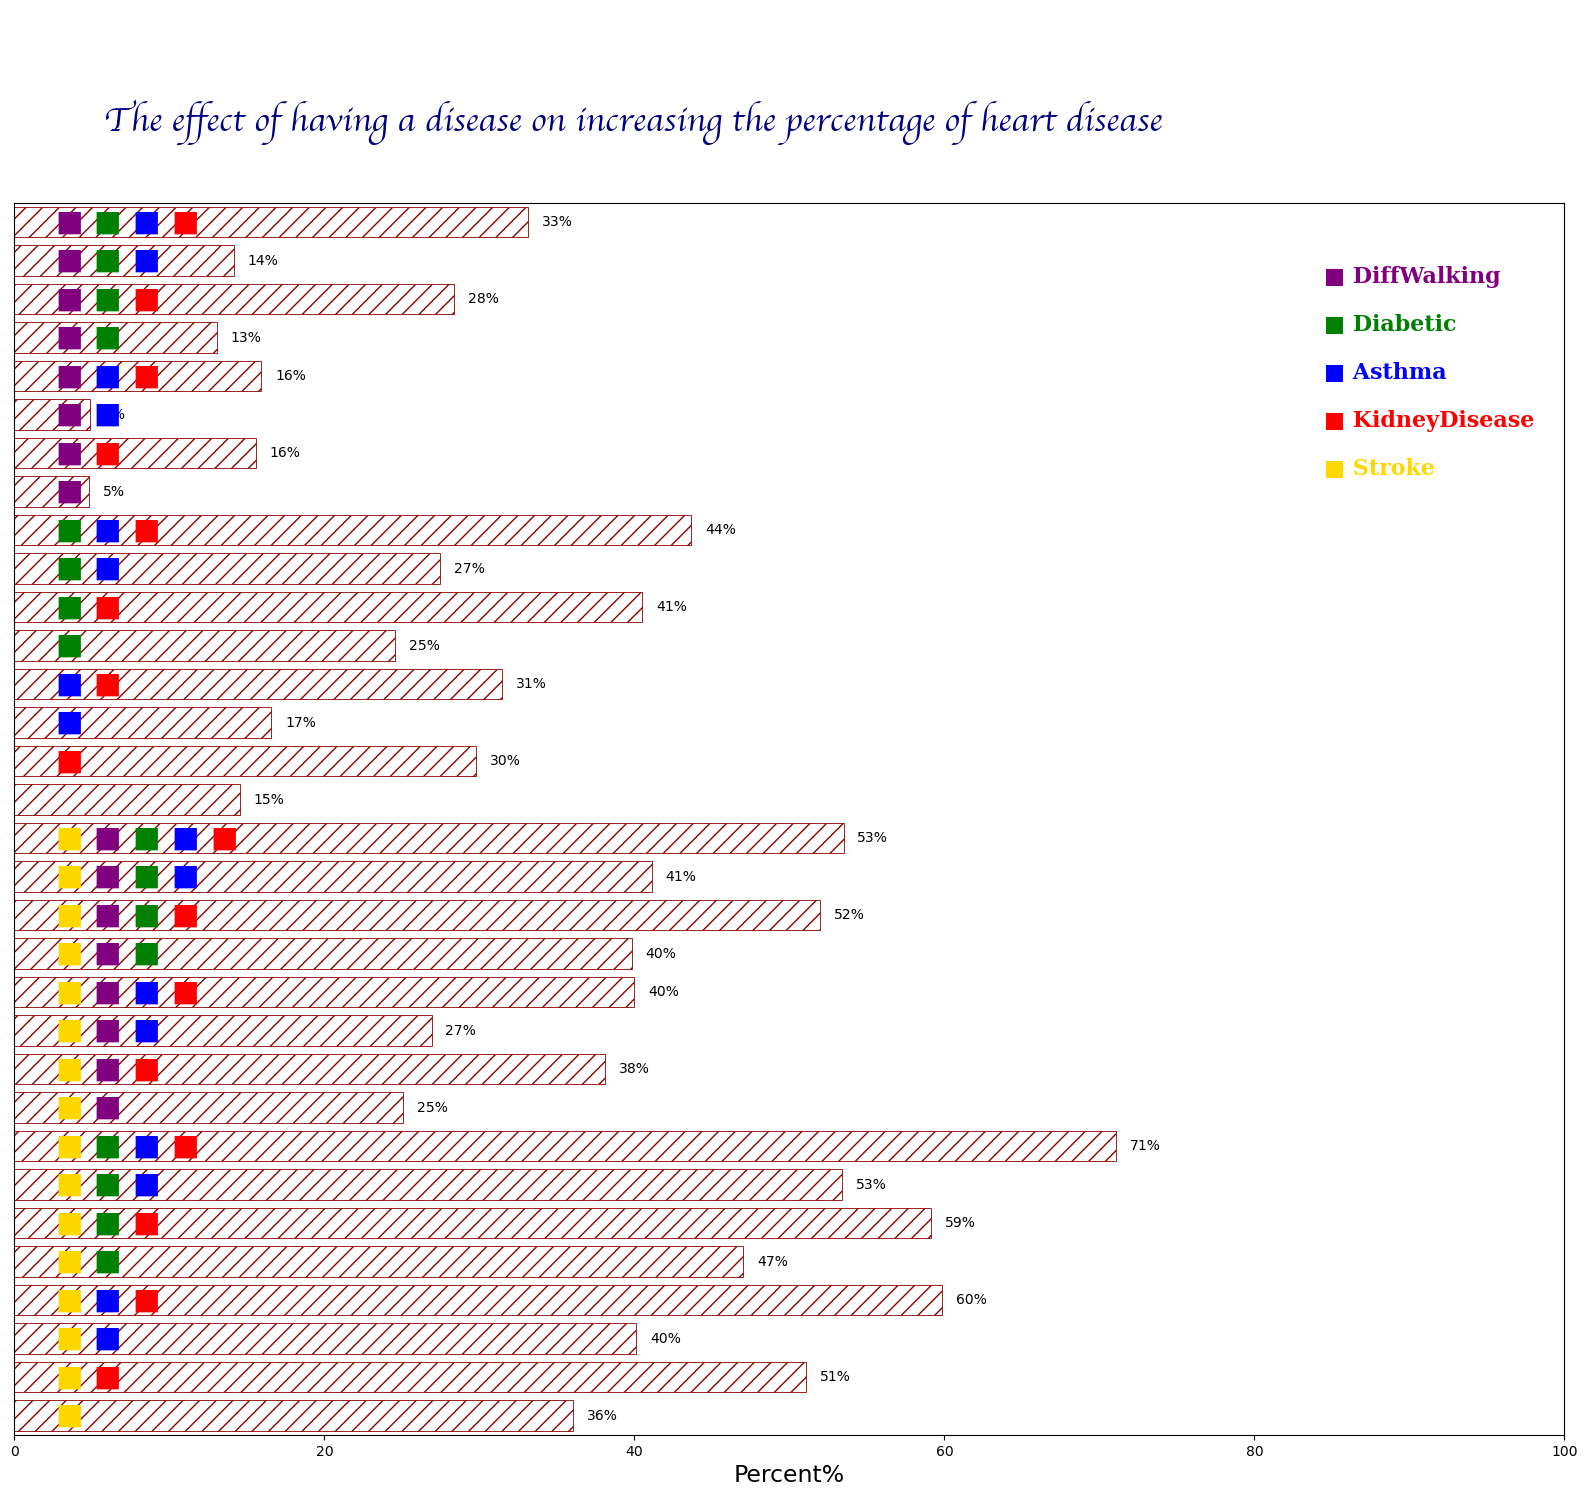

In [ ]:
df_plot_risky_patient_prec= dk.groupby("St_Dif_Dia_As_Ki")['HeartDisease'].value_counts(normalize = True).mul(100)
df_plot_risky_patient_prec = df_plot_risky_patient_prec.rename('percent').reset_index()
    
pd.options.display.max_colwidth  = 999

df_precent=df_plot_risky_patient_prec[df_plot_risky_patient_prec["HeartDisease"]==1]

df_precent
fig, ax = plt.subplots(1, 1,figsize =(20, 16))
ax = sns.barplot(y = df_precent["St_Dif_Dia_As_Ki"], x= df_precent["percent"], 
                orient='h',color="white", hatch='//',edgecolor="darkred",ecolor="black", linewidth=0.6,)


ax.bar_label(ax.containers[0], fmt='%.f%%', padding=10)
colors={
    'Stroke':'gold',
    'DiffWalking':'purple',
    'Diabetic':'green',
    'Asthma':'Blue',
    "KidneyDisease":"red"
}
y=0


axes=[
    ["DiffWalking" , "Diabetic" , "Asthma" , "KidneyDisease"],
     [ "DiffWalking" , "Diabetic" , "Asthma" ],
     [ "DiffWalking" , "Diabetic" ,  "KidneyDisease"],
     [  "DiffWalking" , "Diabetic"],
     [  "DiffWalking" ,  "Asthma" , "KidneyDisease"],
    [  "DiffWalking"  , "Asthma" ],
     [  "DiffWalking" ,  "KidneyDisease"],
     [   "DiffWalking"],
     [   "Diabetic" , "Asthma" , "KidneyDisease"],
     [  "Diabetic" , "Asthma"],
     [  "Diabetic" ,  "KidneyDisease"],
     [  "Diabetic"  ],
     [   "Asthma" , "KidneyDisease"],
     [   "Asthma" ],
     [  "KidneyDisease"],
     [ ],
     ["Stroke" , "DiffWalking" , "Diabetic" , "Asthma" , "KidneyDisease"],
     ["Stroke" , "DiffWalking" , "Diabetic" , "Asthma"],
     ["Stroke" , "DiffWalking" , "Diabetic" ,  "KidneyDisease"],
     ["Stroke" , "DiffWalking" , "Diabetic" ],
     ["Stroke" , "DiffWalking"  , "Asthma" , "KidneyDisease"],
     ["Stroke" , "DiffWalking" , "Asthma"],
     ["Stroke" , "DiffWalking" , "KidneyDisease"],
     ["Stroke" , "DiffWalking"],
     ["Stroke" ,  "Diabetic" , "Asthma" , "KidneyDisease"],
     ["Stroke" ,  "Diabetic" , "Asthma"],
     ["Stroke" ,  'Diabetic'   , "KidneyDisease"],
     ["Stroke" ,  "Diabetic" ],
     ["Stroke" ,  "Asthma" , "KidneyDisease"],
     ["Stroke" ,   "Asthma" , ],
     ["Stroke"  , "KidneyDisease"],
     ["Stroke"  ],
]


for axo in axes:
    x=3.5
    for i in axo:
        ax.annotate('■', ha='center', va='center', fontsize=21, color=colors[i], xy=(x, y),font='Serif')
        x+=2.5
    y+=1
ax.set_xlabel('Percent%', size=17)
ax.axes.get_yaxis().set_visible(False)
ax.set(xlim=(0, 100))

fig.text(0.78,0.83, '■ DiffWalking', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':colors['DiffWalking']} )
fig.text(0.78,0.8,'■ Diabetic', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':colors['Diabetic']})
fig.text(0.78,0.77, '■ Asthma', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':colors['Asthma']})
fig.text(0.78,0.74, '■ KidneyDisease', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':colors['KidneyDisease']})
fig.text(0.78,0.71,'■ Stroke', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':colors['Stroke']} )

fig.text(0.17,0.925,'The effect of having a disease on increasing the percentage of heart disease',{'font':'cursive', 'weight':'bold','color': 'Navy', 'size':25})
fig.text(0.20,0.99, ' ', {'font':'Serif', 'size':'16','color': 'black'})
plt.show()


In [ ]:
dk_a = df.copy()
dk_a.Smoking = dk_a.Smoking.apply(lambda x : 'Smoking' if x == 1 else 'Non Smoking')
dk_a.AlcoholDrinking = dk_a.AlcoholDrinking.apply(lambda x : 'AlcoholDrinking' if x == 1 else 'Non AlcoholDrinking')
dk_a.PhysicalActivity = dk_a.PhysicalActivity.apply(lambda x : 'Active' if x == 1 else 'Inactive')

dk_a.drop(["BMI","Stroke","DiffWalking","Diabetic","MentalHealth","PhysicalHealth","Sex","AgeCategory","Race","Asthma","GenHealth","SleepTime","SkinCancer","KidneyDisease"],axis=1, inplace=True)

from itertools import chain, combinations

Risky_Activity = ["Smoking" , "AlcoholDrinking"  , "PhysicalActivity" ]
Total_bar2=0
tmp2 = []
for i in range(len(Risky_Activity)):
    oc = combinations(Risky_Activity, i + 1)
    for c in oc:
        tmp2.append(list(c))
        Total_bar2+=1

#print(Total_bar2)

#2 Factor
dk_a['Sm_Al'] = dk_a[tmp2[3][0]] + ' & ' + dk_a[tmp2[3][1]]
dk_a['Sm_Ph'] = dk_a[tmp2[4][0]] + ' & ' + dk_a[tmp2[4][1]]
dk_a['Al_Ph'] = dk_a[tmp2[5][0]] + ' & ' + dk_a[tmp2[5][1]]


#3 Factor
dk_a['Sm_Al_Ph'] = dk_a[tmp2[6][0]] + ' & ' + dk_a[tmp2[6][1]]+ ' & ' +dk_a[tmp2[6][2]]

df_plot_risky_Activity_prec= dk_a.groupby("Sm_Al_Ph")['HeartDisease'].value_counts(normalize = True).mul(100)
df_plot_risky_Activity_prec = df_plot_risky_Activity_prec.rename('percent').reset_index()
    
pd.options.display.max_colwidth  = 999

df_A_precent=df_plot_risky_Activity_prec[df_plot_risky_patient_prec["HeartDisease"]==1]

df_A_precent

,Sm_Al_Ph,HeartDisease,percent
1,Non Smoking & AlcoholDrinking & Active,1,2.435934
3,Non Smoking & AlcoholDrinking & Inactive,1,6.655290
5,Non Smoking & Non AlcoholDrinking & Active,1,5.687655
7,Non Smoking & Non AlcoholDrinking & Inactive,1,10.360702
9,Smoking & AlcoholDrinking & Active,1,5.373281
11,Smoking & AlcoholDrinking & Inactive,1,10.986547
13,Smoking & Non AlcoholDrinking & Active,1,11.289708
15,Smoking & Non AlcoholDrinking & Inactive,1,18.075793


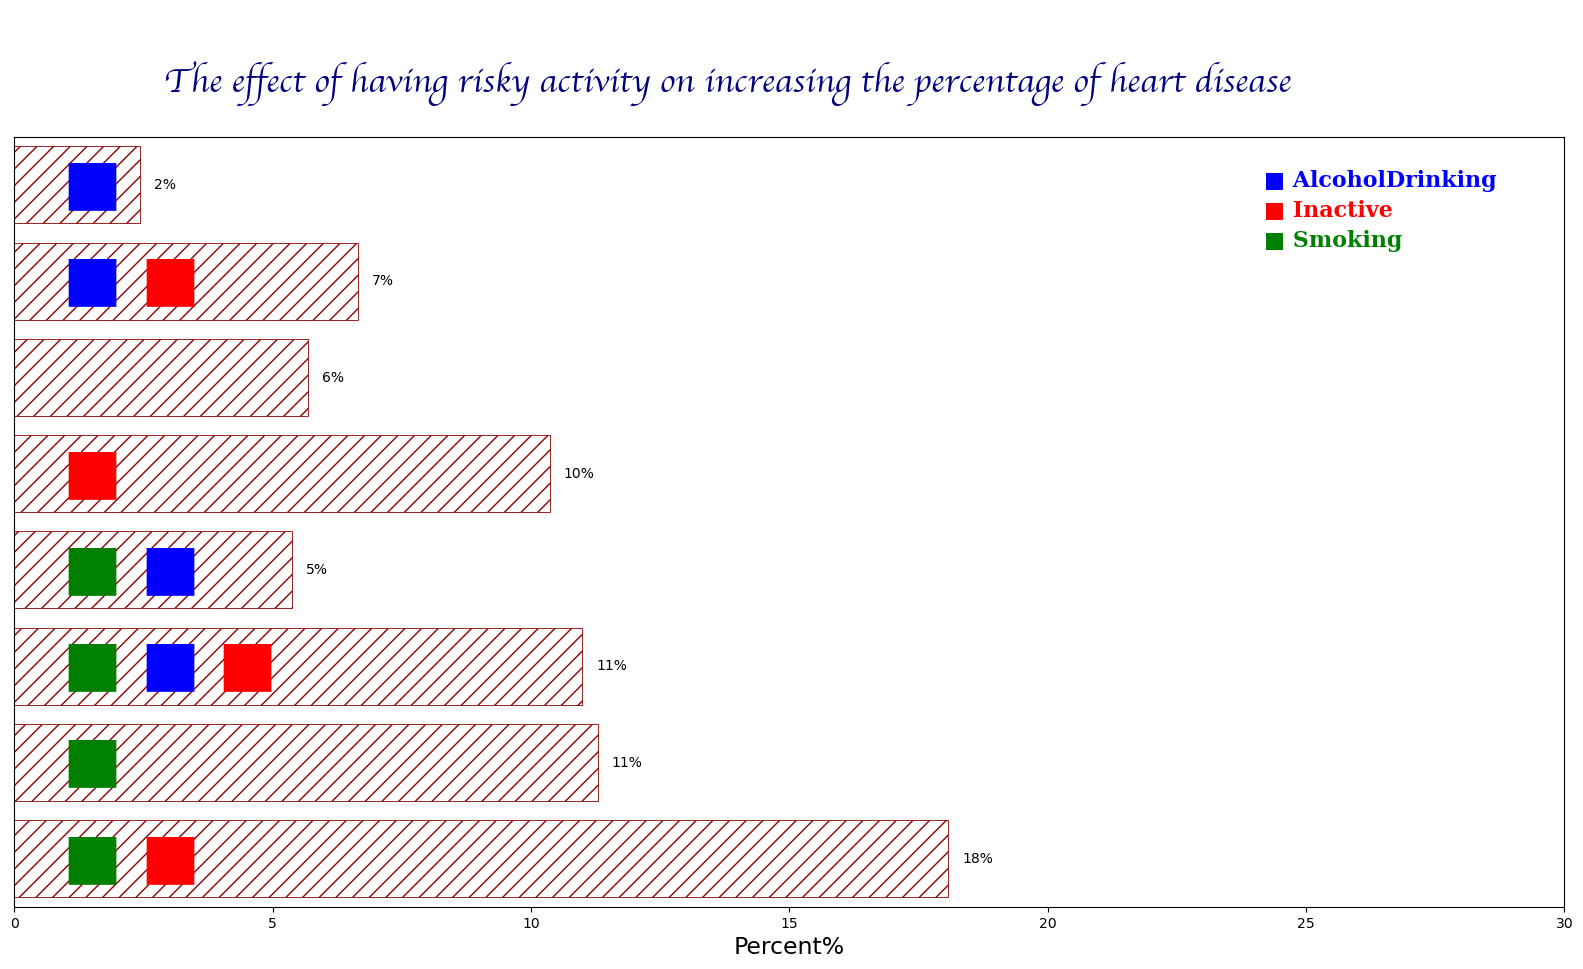

In [ ]:
fig, ax = plt.subplots(1, 1,figsize =(20, 10))
ax = sns.barplot(y = df_A_precent["Sm_Al_Ph"], x= df_A_precent["percent"], 
                orient='h',color="white", hatch='//',edgecolor="darkred",ecolor="black", linewidth=0.6,)


ax.bar_label(ax.containers[0], fmt='%.f%%', padding=10)
colors={
    'AlcoholDrinking':'Blue',
    'Inactive':'red',
    'Smoking':'green'
}
y=0

axes=[
    ["AlcoholDrinking"],
     [ "AlcoholDrinking" , "Inactive"  ],
     [ ],
     [  "Inactive"],
     [  "Smoking" ,  "AlcoholDrinking" ],
    [  "Smoking"  , "AlcoholDrinking", "Inactive" ],
     [  "Smoking" ],
     [   "Smoking", "Inactive"],
]

for axo in axes:
    x=1.5
    for i in axo:
        ax.annotate('■', ha='center', va='center', fontsize=45, color=colors[i], xy=(x, y),font='Serif')
        x+=1.5
    y+=1
ax.set_xlabel('Percent%', size=17)
ax.axes.get_yaxis().set_visible(False)
ax.set(xlim=(0, 30))

fig.text(0.75,0.83, '■ AlcoholDrinking', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':colors['AlcoholDrinking']} )
fig.text(0.75,0.8,'■ Inactive', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':colors['Inactive']})
fig.text(0.75,0.77, '■ Smoking', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':colors['Smoking']})


fig.text(0.20,0.925,'The effect of having risky activity on increasing the percentage of heart disease',{'font':'cursive', 'weight':'bold','color': 'Navy', 'size':25})
fig.text(0.20,0.99, ' ', {'font':'Serif', 'size':'16','color': 'black'})
plt.show()

## Split Dataset for Training and Testing

In [ ]:
x,y = df_clean.drop(["HeartDisease"], axis=1), df_clean["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split( x,y, test_size=0.2, random_state=0)

---

## Modelling

### Classification Tree

In [ ]:
X = df1.drop(columns=["HeartDisease"]).copy()
y = df1["HeartDisease"].copy()
# hahhahahahahah

In [ ]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.1, stratify=y, random_state=11)
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=.5, stratify=y_rest, random_state=11)

print("training size:", X_train.shape[0])
print("dev size:", X_dev.shape[0])
print("test size:", X_test.shape[0])

training size: 271173
dev size: 15065
test size: 15066


In [ ]:
## Declaring the Variable
nominal_features = ["Race", "Sex"]
ordinal_features = X.select_dtypes(
    include="object"
).drop(columns=nominal_features).columns.tolist()

print("nominal features:", nominal_features)
print("ordinal features:")
print(ordinal_features, compact=True)

KeyError: "['Sex'] not found in axis"

In [ ]:
onehot = OneHotEncoder()
onehot.fit(X_train[nominal_features])
X_train_onehot = pd.DataFrame(
    onehot.transform(X_train[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_dev_onehot = pd.DataFrame(
    onehot.transform(X_dev[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_test_onehot = pd.DataFrame(
    onehot.transform(X_test[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
print("one-hot matrix:")
print(X_train_onehot)

ordinal = OrdinalEncoder()
ordinal.fit(X_train[ordinal_features])
X_train_ordinal = pd.DataFrame(
    ordinal.transform(X_train[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_dev_ordinal = pd.DataFrame(
    ordinal.transform(X_dev[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_test_ordinal = pd.DataFrame(
    ordinal.transform(X_test[ordinal_features]),
    columns=ordinal.feature_names_in_
)
print("ordinal matrix:")
print(X_train_ordinal)

In [ ]:
pd.concat(
    [X_train.AgeCategory.reset_index(drop=True), X_train_ordinal.AgeCategory],
    axis=1,
    ignore_index=True
).groupby(1)[0].agg(set)

In [ ]:
numerical_features=df.select_dtypes(include='number').columns.tolist()
categorical_features=df.select_dtypes(include='object').columns.tolist()


In [ ]:
X_train_combined = pd.concat(
    [X_train[numerical_features].reset_index(drop=True), X_train_onehot, X_train_ordinal],
    axis=1
)
X_dev_combined = pd.concat(
    [X_dev[numerical_features].reset_index(drop=True), X_dev_onehot, X_dev_ordinal],
    axis=1
)
X_test_combined = pd.concat(
    [X_test[numerical_features].reset_index(drop=True), X_test_onehot, X_test_ordinal],
    axis=1
)

X_train_combined.head()

In [ ]:
from IPython.display import display
scaler = StandardScaler()
scaler.fit(X_train_combined)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_combined),
    columns=X_train_combined.columns
)
X_dev_scaled = pd.DataFrame(
    scaler.transform(X_dev_combined),
    columns=X_dev_combined.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_combined),
    columns=X_test_combined.columns
)

with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

In [ ]:
model_default = DecisionTreeClassifier(random_state=11)
model_default.fit(X_train_scaled, y_train)

preds_train = model_default.predict(X_train_scaled)
preds_dev = model_default.predict(X_dev_scaled)
preds_test = model_default.predict(X_test_scaled)

In [ ]:
print("train prediction samples:\n", preds_train[:10])
print("train target samples:\n", y_train[:10].tolist())
print("test prediction samples:\n", preds_test[:10])
print("test target samples:\n", y_test[:10].tolist())

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(model_default, max_depth=5)
plt.show()

In [ ]:
print(classification_report(y_test, preds_test))

ConfusionMatrixDisplay.from_predictions(y_test, preds_test)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

### Random Forest

### Neural Network

In [ ]:
# Building the Model
model = keras.Sequential([
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Configures the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [ ]:
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 6s 745us/step - binary_accuracy: 0.8894 - loss: 0.2973
Epoch 2/3
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 5s 693us/step - binary_accuracy: 0.9095 - loss: 0.2447
Epoch 3/3
7533/7533 ━━━━━━━━━━━━━━━━━━━━ 5s 703us/step - binary_accuracy: 0.9094 - loss: 0.2440


1884/1884 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - binary_accuracy: 0.9112 - loss: 0.2383
Test Loss: 0.23993125557899475
Test Accuracy: 0.910323441028595
1884/1884 ━━━━━━━━━━━━━━━━━━━━ 1s 257us/step


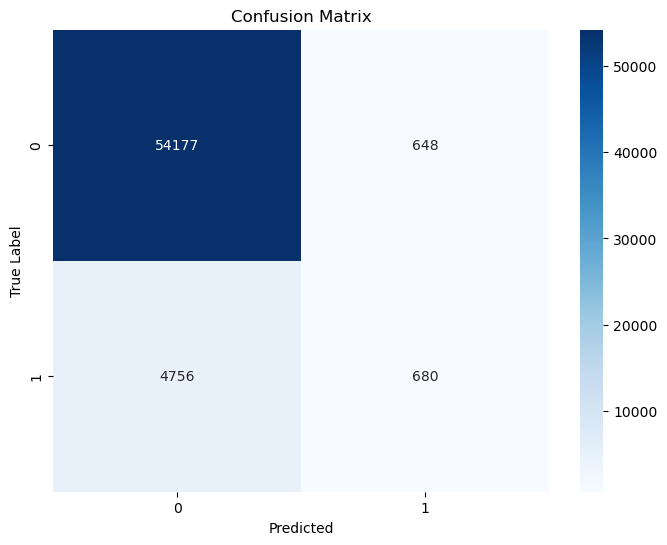

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

predictions = model.predict(x_test)
predictions = (predictions > 0.5).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

---

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dbd54fe7-a025-4ac1-b86e-6565b45cc6fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>